In [4]:
import numpy as np
import keras
from keras import layers


import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7658 - loss: 0.7509 - val_accuracy: 0.9780 - val_loss: 0.0802
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9651 - loss: 0.1117 - val_accuracy: 0.9848 - val_loss: 0.0572
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9734 - loss: 0.0862 - val_accuracy: 0.9887 - val_loss: 0.0449
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9779 - loss: 0.0703 - val_accuracy: 0.9883 - val_loss: 0.0433
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9815 - loss: 0.0580 - val_accuracy: 0.9900 - val_loss: 0.0360
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9838 - loss: 0.0518 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9845 - loss: 0.0485 - val_accuracy: 0.9903 - val_loss: 0.0335
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9848 - loss: 0.0479 - val_accu

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02574595995247364
Test accuracy: 0.991100013256073


In [10]:
model.save("models/simple_mnist.keras")

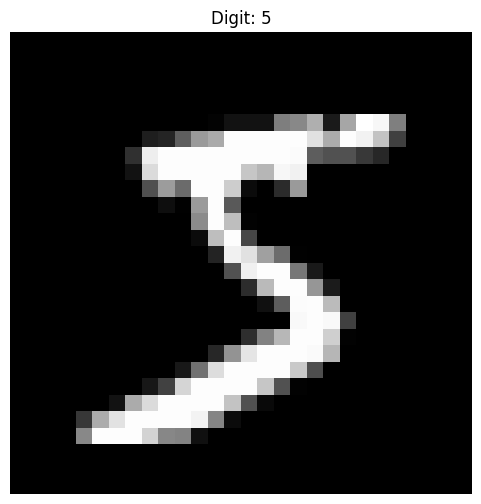

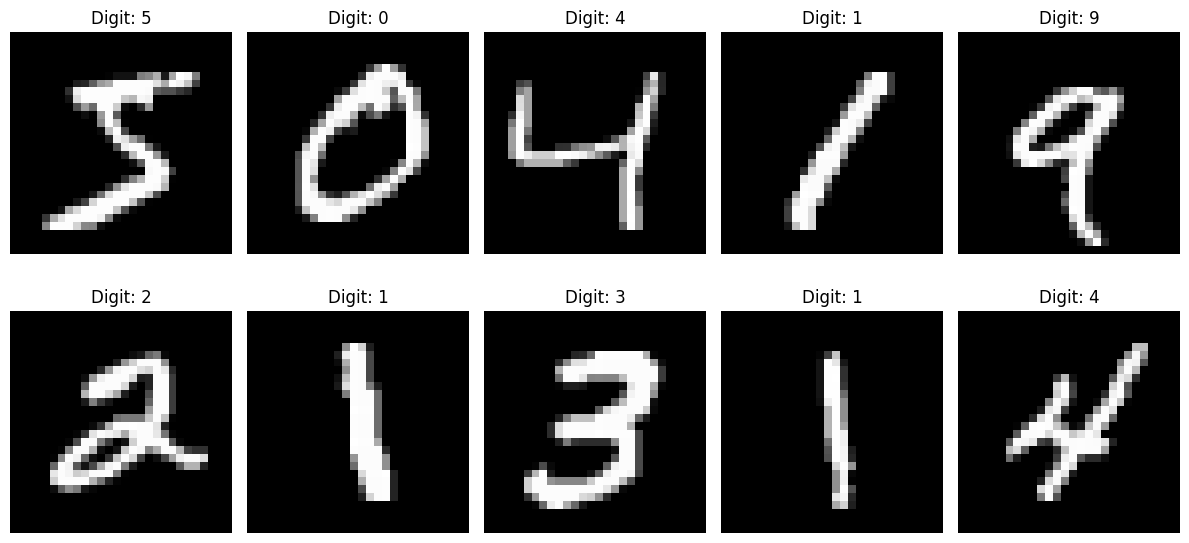

In [13]:
# Plot one of the digits
import matplotlib.pyplot as plt

# Choose a digit to plot (you can change this index)
digit_index = 0  # First digit in the dataset

# Get the digit image and reshape it for plotting
digit_image = x_train[digit_index].reshape(28, 28)  # Remove the channel dimension
digit_label = np.argmax(y_train[digit_index])  # Get the actual label

# Create the plot
plt.figure(figsize=(6, 6))
plt.imshow(digit_image, cmap='gray')
plt.title(f'Digit: {digit_label}')
plt.axis('off')
plt.show()

# You can also plot multiple digits
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    digit_image = x_train[i].reshape(28, 28)
    digit_label = np.argmax(y_train[i])
    
    axes[row, col].imshow(digit_image, cmap='gray')
    axes[row, col].set_title(f'Digit: {digit_label}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [12]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 11.6 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.6 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]



Loading: cropped_image.png


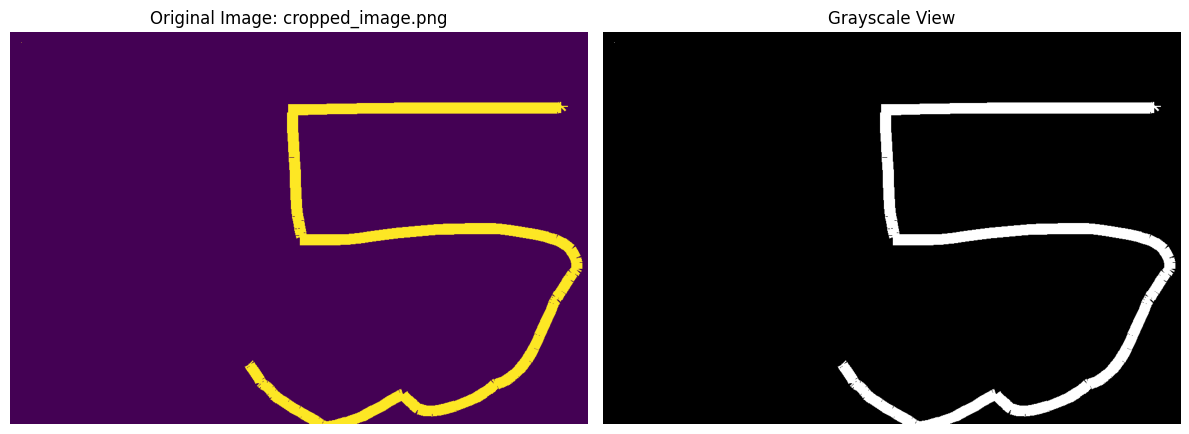

Image loaded from: cropped_image.png
Image size: (1037, 704)
Image mode: L
Array shape: (704, 1037)

Loading: mnist_image.png


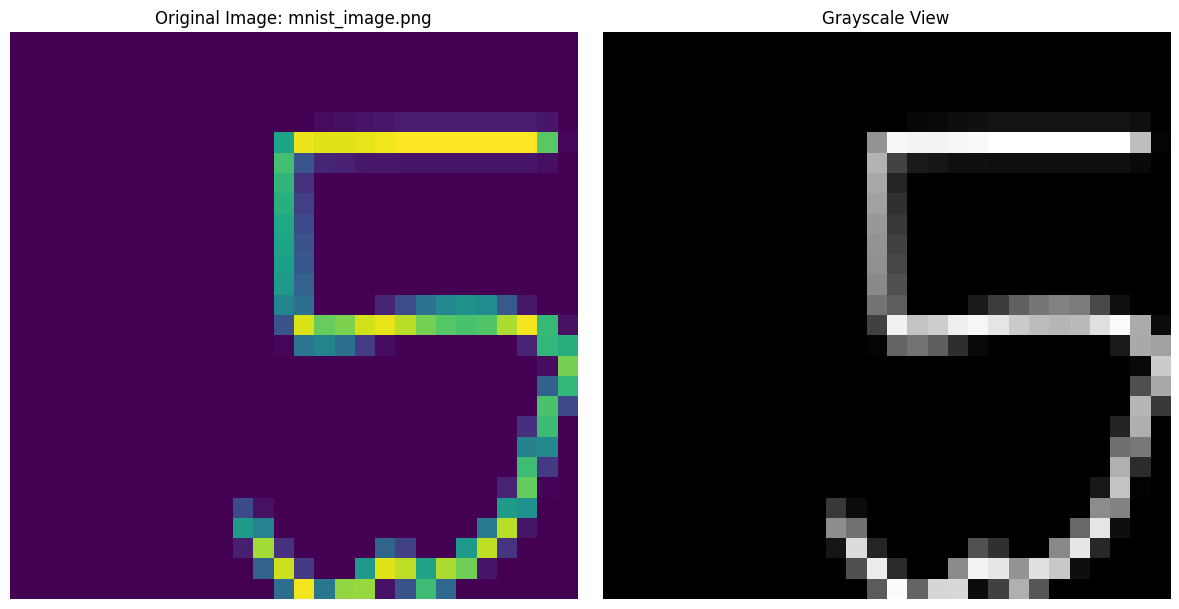

Image loaded from: mnist_image.png
Image size: (28, 28)
Image mode: L
Array shape: (28, 28)


In [33]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def load_and_plot_image(image_path):
    """
    Load an image and plot it using matplotlib
    
    Args:
        image_path (str): Path to the image file
    """
    try:
        # Load the image using PIL
        img = Image.open(image_path)
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Create a figure with subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Plot the original image
        ax1.imshow(img)
        ax1.set_title(f'Original Image: {image_path}')
        ax1.axis('off')
        
        # Plot with different colormap if it's grayscale
        if len(img_array.shape) == 2 or (len(img_array.shape) == 3 and img_array.shape[2] == 1):
            # Grayscale image
            ax2.imshow(img_array, cmap='gray')
            ax2.set_title('Grayscale View')
        else:
            # Color image
            ax2.imshow(img_array)
            ax2.set_title('Color View')
        ax2.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Print image information
        print(f"Image loaded from: {image_path}")
        print(f"Image size: {img.size}")
        print(f"Image mode: {img.mode}")
        print(f"Array shape: {img_array.shape}")
        
    except Exception as e:
        print(f"Error loading image: {e}")

if __name__ == "__main__":
    # Try to load and plot the available images
    images = ["cropped_image.png", "mnist_image.png"]
    
    for image_path in images:
        print(f"\n{'='*50}")
        print(f"Loading: {image_path}")
        print('='*50)
        load_and_plot_image(image_path)

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

In [32]:

# Load and process image
img = Image.open("mnist_image.png").convert('L').resize((28, 28))
img_array = np.array(img).astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=(0, -1))

# Predict
prediction = model.predict(img_array, verbose=0)
predicted_digit = np.argmax(prediction[0])
confidence = np.max(prediction[0])

print(f"Predicted digit: {predicted_digit}")
print(f"Confidence: {confidence:.3f}")

Predicted digit: 5
Confidence: 0.925
